<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Depth_aware_CNN_for_RGB_D_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Depth-aware CNN for RGB-D Segmentation**

논문 링크: https://arxiv.org/abs/1803.06791

CNN(Convolution Neural Network)는 고정된 grid kernel 구조이기 때문에 **기하학적 정보(geometric information)을 처리하는데 한계**가 있다. depth data의 가용성은 CNN을 사용한 RGB-D semantic segmentation을 가능하게 한다.

기존의 SOTA 방법은 **depth를 추가적인 image로 사용하는 network**(= 즉, RGB image를 위한 network와 Depth image를 위한 network가 따로 존재) 이거나 **3D volume을 처리하는 volumetric CNN** 혹은 **point cloud 공간 정보를 처리하는 3D point cloud graph network**가 있다. 그러나 이들은 모두 높은 계산 및 메모리 비용이 들기 때문에 어려움이 있다.

따라서 본 논문에서는 이를 해결하기 위해 **depth-aware convolution**과 **depth-aware average pooling**을 제안한다.

## **Depth-aware CNN**

먼저, **Depth-aware convolution**은 standard convolution을 depth similarity term으로 확장한 것이다. **kernel의 중심에 있는 비슷한 dpeth의 pixel이 output에 더 많이 기여할 수 있도록 강제**한다. 이 간단한 방법을 통해 convolution이 고정 grid geometric structure로 제한되지 않는 depth-aware receptive field를 구축하는데 도움을 줄 수 있다.

두 번째로 **Depth-aware average pooling**은 filter가 feature map의 local region에 적용될 시 average pooling답게 local region의 평균을 계산하게 되는데, 이렇게 **local region의 평균을 계산할 때 neighboring pixel의 depth에 대한 쌍별(pairwise) 관계를 고려**한다.

이러한 geometry-aware operation을 통해 depth image를 사용하여 object의 boundary를 보다 잘 구분할 수 있다. 두 연산자는 모두 **동일한 semantic label과 비슷한 depth를 가진 pixel이 서로 관계가 깊다**는 직관에 기반한다. 이게 무슨 뜻이냐면 아래 그림을 보면서 설명을 해보겠다.

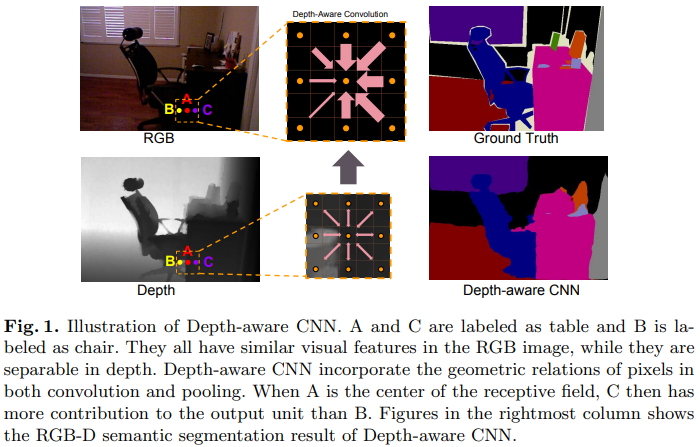

위의 그림 Figure 1을 보겠다. 위 그림에서 A와 C는 Table로 label이 지정되어 있고, B만 Chair로 지정이 되어 있다. **A, B, C는 단순 RGB에서는 표현되지 않는 반면, Depth에서는 차이가 분명**하다. 이처럼 CNN에서 depth 상관 관계를 encoding함으로써 정보 전파 과정에서 픽셀 C가 픽셀 B보다 output에 더 많은 기여를 한다.

depth-aware convolution과 depth-aware average pooling은 모두 feature map x ∈ R^c_i×h×w과 depth image D ∈ R^h×w가 필요하다. 이때, c_i는 input 채널 수이고 h는 높이 w는 너비이다. output feature map은 y ∈ R^c_o×h×w이며 c_o는 output 채널 수 이다.

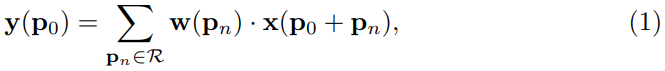

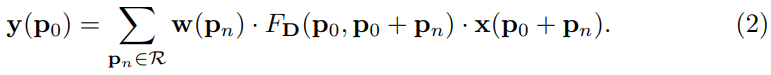

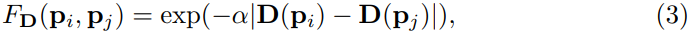

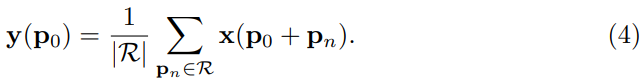

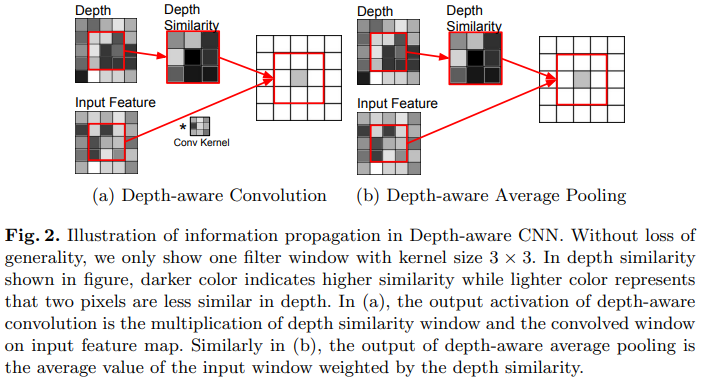